In [1]:
import tools, evaluation, datasets

Using gpu device 0: GeForce GTX TITAN Black (CNMeM is disabled)


In [2]:
dataset = datasets.load_dataset(name='coco', cnn='relu_oversample', captions='raw')
m = tools.load_model('snapshots/coco_new_ablation_hierarchy_raw_relu_oversample.npz')
from hierarchy_data import HierarchyData
dev = HierarchyData(dataset['dev'], m['worddict'], n_words = len(m['worddict']))
caps, ims = dev.all()
I = tools.encode_images(m, ims)
S = tools.encode_sentences(m, caps)
import model
import theano
from model import build_errors
inps, errs = build_errors(m['options'])
m['f_err'] = theano.function(inps, errs)
errs= tools.compute_errors(m, S, I)

snapshots/coco_new_ablation_hierarchy_raw_relu_oversample.npz
Loading dictionary...
Creating inverted dictionary...
Loading model options...
Loading model parameters...
Compiling sentence encoder...
Compiling image encoder...
Packing up...


/u/vendrov/anaconda/lib/python2.7/site-packages/theano/scan_module/scan.py:1019: Warning: In the strict mode, all neccessary shared variables must be passed as a part of non_sequences
  'must be passed as a part of non_sequences', Warning)


In [3]:
train = HierarchyData(dataset['train'], m['worddict'], n_words = len(m['worddict']))
caps, ims = train.all()
I = tools.encode_images(m, ims)
S = tools.encode_sentences(m, caps)

In [4]:
import json
filepaths = json.load(open('/u/vendrov/qanda/hierarchy/coco/filepaths.json', 'r'))

In [5]:
id2index = {}
for (i, filepath) in enumerate(filepaths):
    id2index[int(filepath[-10:-4])] = i

In [6]:
import numpy
def closest(q1, q2, max=True, below=True, captions=True, n=3):
    q = numpy.fmax(q1,q2) if max else numpy.fmin(q1,q2)
    T = S if captions else I
    es = tools.compute_errors(m, q, T).flatten() if below else tools.compute_errors(m, T, q).flatten()
    inds = numpy.argsort(es)
    def info(i):
        if captions:
            return caps[i]
        else:
            return filepaths[i]
    return zip(map(info, inds[:n]), es[inds[:n]])

In [7]:
def embc(c):
    return tools.encode_sentences(m,[c])
def embi(i):
    return I[i].reshape((1, -1))
def emb(o):
    if type(o) == type(''):
        return embc(o)
    else:
        return embi(o)

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [22]:
apple = id2index[308829]
banana = id2index[6151]
banana_boy = id2index[320537]
bunch_of_bananas = id2index[432053]
seagull = id2index[388881]
person_sheep = id2index[129860]
cat_dog = id2index[153811]
giraffe = id2index[340185]
horse = id2index[42060]
man_horse_dog = id2index[520449]
horse_elephant = id2index[382873]
#plt.imshow(mpimg.imread('/ais/gobi3/datasets/mscoco/images/' + filepaths[apple]))
#plt.axis('off')

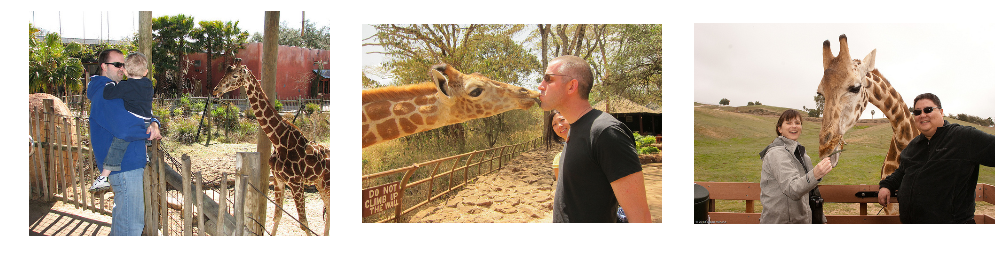

In [29]:
o2 = giraffe
o1 = 'man'


results = closest(emb(o1), emb(o2),max=True, below=True, captions=False, n=5)[1:4]
import textwrap

fig = plt.figure(figsize=(14,20))
for (i, result) in enumerate(results):
    (obj, error) = result
    p = fig.add_subplot(1, len(results), i+1)
    if obj.endswith('jpg'):
        img = mpimg.imread('/ais/gobi3/datasets/mscoco/images/' + obj)
        plt.imshow(img)
    else:
        print(obj)
        #p.set_title('\n'.join(textwrap.wrap(obj, 40)))
    plt.axis('off')
plt.tight_layout()
plt.show()

[('a black dog on top of brown and white dog', 0.43450081),
 ('a furry black cat laying near a dog', 0.44262928),
 ('a black puppy lays on a white surface with a stuffed dog', 0.44304389),
 ('a large black dog next to a little cat', 0.4629198),
 ('this is a photo of a sad looking black lab dog', 0.48152077),
 ('a black puppy looking at a toy on a blanket', 0.48845565),
 ('a small black dog sits down next to a stuffed toy dog', 0.48934585),
 ('the black dog is staring at the cat', 0.49092728),
 ('a very cute black dog on a leash', 0.49301976),
 ('a small brown dog standing next to a small black and brown dog',
  0.49866599)]

'a cat and dog napping together on the couch'